In [43]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from PIL import Image

In [44]:
pic = Image.open('JOHFRA.jpg')

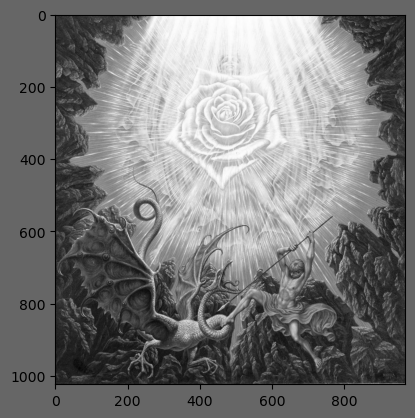

In [45]:
picBW = pic.convert('L')
plt.figure(facecolor='0.4')
plt.imshow(picBW, cmap='gray')

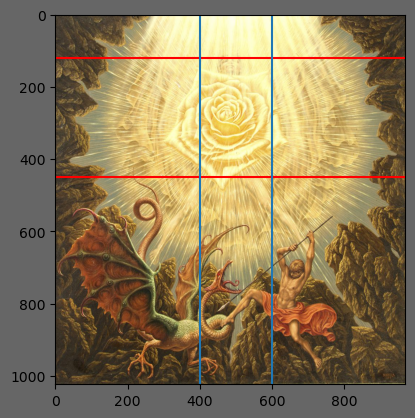

In [46]:
plt.figure(facecolor='0.4')
plt.imshow(pic)
plt.plot([0,969],[120, 120], 'r')
plt.plot([0,969],[450, 450], 'r')
plt.axvline(x=400)
plt.axvline(x=600)

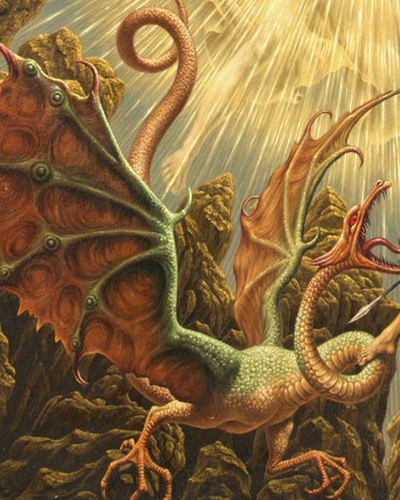

In [47]:
crop = pic.crop([100,500,500,1000])
crop

In [48]:
mpic = np.array(picBW)
mpic

array([[ 47,  47,  49, ...,  58,  61,  58],
       [ 54,  54,  55, ...,  66,  57,  55],
       [ 68,  68,  66, ...,  65,  58,  56],
       ...,
       [ 65,  58,  53, ...,  70,  72,  69],
       [ 58,  53,  49, ...,  91, 107, 106],
       [ 46,  50,  53, ..., 165, 170, 174]], dtype=uint8)

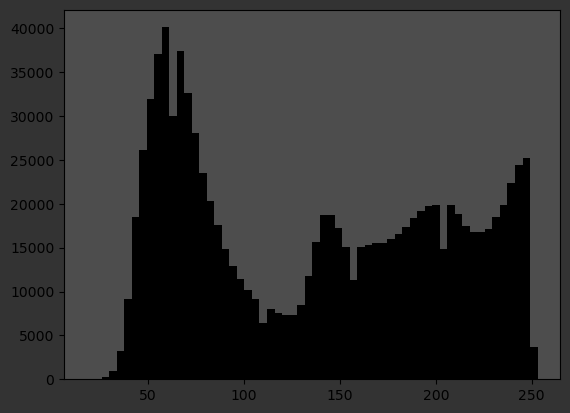

In [49]:
pixels = mpic.flatten()

plt.figure(facecolor='0.2')
plt.axes().set_facecolor('0.3')
plt.hist(pixels,60, color='black')
plt.show()